### Importing Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder , PowerTransformer


### Read Data 

In [2]:
df_before = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\graduaction project\2019-Oct.csv")
df = df_before.sample(n=500000, random_state=42)

### Know Some Info About Data 

In [3]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
10257365,2019-10-09 02:46:19 UTC,view,29900078,2059484601444729123,NaN,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa
28875143,2019-10-21 16:17:11 UTC,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e
28709595,2019-10-21 14:42:20 UTC,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3
3458568,2019-10-03 18:40:22 UTC,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c
25352815,2019-10-19 08:58:51 UTC,view,5300097,2053013563173241677,NaN,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 10257365 to 38106461
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     500000 non-null  object 
 1   event_type     500000 non-null  object 
 2   product_id     500000 non-null  int64  
 3   category_id    500000 non-null  int64  
 4   category_code  341032 non-null  object 
 5   brand          427692 non-null  object 
 6   price          500000 non-null  float64
 7   user_id        500000 non-null  int64  
 8   user_session   500000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 38.1+ MB


In [5]:
# This IS The Important Column 

df["event_type"].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [6]:
# To Know The Data Type Of Each Column

print(f"tHe Data Types Of Ecah Column :\n\n{df.dtypes}")

tHe Data Types Of Ecah Column :

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object


### Handle Nans 

In [7]:
# Check Nans 

print(f"The Number Of Nans : \n\n{df.isna().sum()}")

The Number Of Nans : 

event_time            0
event_type            0
product_id            0
category_id           0
category_code    158968
brand             72308
price                 0
user_id               0
user_session          0
dtype: int64


In [8]:
# To Know The Shape Of Data 

df.shape

(500000, 9)

In [9]:
# Drop Nans 

df = df.dropna(subset= ['category_code' , 'brand'])


In [10]:
# Now We Handle All The Nans Value 

df.isna().sum()


event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [11]:
# Check Duplicates 


print(f"The Number oF Duplicates : {df.duplicated().sum()}")

The Number oF Duplicates : 7


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
# To Make Sure That We Drop Duplicates 

print(f"The Number oF Duplicates : {df.duplicated().sum()}") 


The Number oF Duplicates : 0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313032 entries, 28875143 to 38106461
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     313032 non-null  object 
 1   event_type     313032 non-null  object 
 2   product_id     313032 non-null  int64  
 3   category_id    313032 non-null  int64  
 4   category_code  313032 non-null  object 
 5   brand          313032 non-null  object 
 6   price          313032 non-null  float64
 7   user_id        313032 non-null  int64  
 8   user_session   313032 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 23.9+ MB


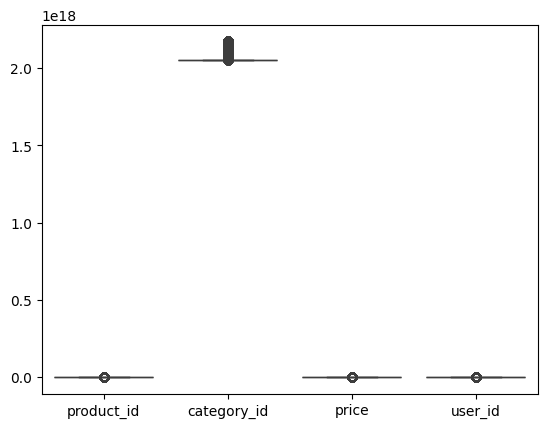

In [15]:
# Some Visualisation To Show The Outliers 

sns.boxplot(data= df)
plt.show()

# There IS No Outliers Because We Will Handle The Outliers By Scaling

### Feature Engineering

In [16]:
df['event_time'].unique()

array(['2019-10-21 16:17:11 UTC', '2019-10-21 14:42:20 UTC',
       '2019-10-03 18:40:22 UTC', ..., '2019-10-12 13:41:40 UTC',
       '2019-10-20 04:52:10 UTC', '2019-10-28 11:49:53 UTC'],
      shape=(290562,), dtype=object)

In [17]:
# We Sort Data Before AnyThing To Be Easy To Access And Understand 


df = df.sort_values(by=['user_id', 'event_time'])

In [18]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
17391635,2019-10-13 20:08:40 UTC,view,7005168,2053013560346280633,kids.carriage,anex,687.28,240236728,5ee3cb59-0577-4e85-8148-4183ea273f23
387798,2019-10-01 08:47:35 UTC,view,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,244951053,91769fdf-461b-4e43-9c73-88a07481b75c
8208969,2019-10-07 11:37:35 UTC,view,11200098,2053013562946749253,appliances.personal.scales,polaris,22.63,278043824,c122da46-68a0-4c47-bce4-85d82d05c6e8
18386465,2019-10-14 14:36:49 UTC,view,1800931,2053013554415534427,electronics.video.tv,sony,380.70,282977436,b9a7936a-abd9-4330-ae3b-df38c77b4ff4
14972008,2019-10-12 10:21:10 UTC,view,1004957,2053013555631882655,electronics.smartphone,xiaomi,341.74,292006376,9306d913-79c1-41ea-b5d3-b33b2552ffe1
...,...,...,...,...,...,...,...,...,...
42437062,2019-10-31 22:27:35 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,949.47,566269973,e2cf5f23-013d-414f-9a5f-b57554b6b6fb
42438818,2019-10-31 22:39:26 UTC,view,1003533,2053013555631882655,electronics.smartphone,samsung,301.08,566271497,dd56c899-0da3-46ac-9909-78698522f3d0
42440550,2019-10-31 22:52:00 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,566273230,c4d2bb20-78ed-4be7-990a-a5d3fbff3c26
42442007,2019-10-31 23:04:05 UTC,view,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,566274809,be93ca60-ab07-48e9-9843-aac67b64c823


### Help Us With Customer Analysis 

In [19]:
# Create Some Important Features For Ml Moddel 

df['event_time'] = pd.to_datetime(df["event_time"])   # To Convert This Feature To Read In Right Date Format 


In [20]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
17391635,2019-10-13 20:08:40+00:00,view,7005168,2053013560346280633,kids.carriage,anex,687.28,240236728,5ee3cb59-0577-4e85-8148-4183ea273f23
387798,2019-10-01 08:47:35+00:00,view,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,244951053,91769fdf-461b-4e43-9c73-88a07481b75c
8208969,2019-10-07 11:37:35+00:00,view,11200098,2053013562946749253,appliances.personal.scales,polaris,22.63,278043824,c122da46-68a0-4c47-bce4-85d82d05c6e8
18386465,2019-10-14 14:36:49+00:00,view,1800931,2053013554415534427,electronics.video.tv,sony,380.70,282977436,b9a7936a-abd9-4330-ae3b-df38c77b4ff4
14972008,2019-10-12 10:21:10+00:00,view,1004957,2053013555631882655,electronics.smartphone,xiaomi,341.74,292006376,9306d913-79c1-41ea-b5d3-b33b2552ffe1


In [21]:
# This Table Explain What is The arrangement OF The Week

# Day	            Number
# Monday	            0
# Tuesday	            1
# Wednesday	            2
# Thursday	            3
# Friday	            4
# Saturday	            5
# Sunday	            6

In [22]:
# Create All Features Related To The Time
#  We Extract The Data From Column The Event_time 
 

df["date"] = df["event_time"].dt.date    #  The All Date 

df["year"] = df["event_time"].dt.year    # The Year

df["month"] = df["event_time"].dt.month  # Month

df["day"] = df["event_time"].dt.day      # Day 

df ['hour'] = df["event_time"].dt.hour   # Hour

df["week_end"] = df["event_time"].dt.weekday  # Week_Day

df["is_week_end"] = df["week_end"].isin([5 , 6 ]).astype(int)    # دي اجازه الاجانب  

In [23]:
# To Know The Values The Column Of is_week_end

df["is_week_end"].unique()

array([1, 0])

In [24]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,year,month,day,hour,week_end,is_week_end
17391635,2019-10-13 20:08:40+00:00,view,7005168,2053013560346280633,kids.carriage,anex,687.28,240236728,5ee3cb59-0577-4e85-8148-4183ea273f23,2019-10-13,2019,10,13,20,6,1
387798,2019-10-01 08:47:35+00:00,view,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,244951053,91769fdf-461b-4e43-9c73-88a07481b75c,2019-10-01,2019,10,1,8,1,0
8208969,2019-10-07 11:37:35+00:00,view,11200098,2053013562946749253,appliances.personal.scales,polaris,22.63,278043824,c122da46-68a0-4c47-bce4-85d82d05c6e8,2019-10-07,2019,10,7,11,0,0
18386465,2019-10-14 14:36:49+00:00,view,1800931,2053013554415534427,electronics.video.tv,sony,380.70,282977436,b9a7936a-abd9-4330-ae3b-df38c77b4ff4,2019-10-14,2019,10,14,14,0,0
14972008,2019-10-12 10:21:10+00:00,view,1004957,2053013555631882655,electronics.smartphone,xiaomi,341.74,292006376,9306d913-79c1-41ea-b5d3-b33b2552ffe1,2019-10-12,2019,10,12,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42437062,2019-10-31 22:27:35+00:00,view,1005115,2053013555631882655,electronics.smartphone,apple,949.47,566269973,e2cf5f23-013d-414f-9a5f-b57554b6b6fb,2019-10-31,2019,10,31,22,3,0
42438818,2019-10-31 22:39:26+00:00,view,1003533,2053013555631882655,electronics.smartphone,samsung,301.08,566271497,dd56c899-0da3-46ac-9909-78698522f3d0,2019-10-31,2019,10,31,22,3,0
42440550,2019-10-31 22:52:00+00:00,view,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,566273230,c4d2bb20-78ed-4be7-990a-a5d3fbff3c26,2019-10-31,2019,10,31,22,3,0
42442007,2019-10-31 23:04:05+00:00,view,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,566274809,be93ca60-ab07-48e9-9843-aac67b64c823,2019-10-31,2019,10,31,23,3,0


In [25]:
df['user_session'].unique()

array(['5ee3cb59-0577-4e85-8148-4183ea273f23',
       '91769fdf-461b-4e43-9c73-88a07481b75c',
       'c122da46-68a0-4c47-bce4-85d82d05c6e8', ...,
       'c4d2bb20-78ed-4be7-990a-a5d3fbff3c26',
       'be93ca60-ab07-48e9-9843-aac67b64c823',
       'edefb12d-1db4-44e9-b900-751d8c67a82b'],
      shape=(294558,), dtype=object)

In [26]:
# Create  User Session ( 30 Minutes )
# This Help Us To Know what is The Time Customer Spent 
# From The Sheet We Can Know That The User Session Is 30 Minutes 


df['time_diff'] = df.groupby('user_id')['event_time'].diff().dt.total_seconds() / 60       # The Difference betwen the last and previous event    , and we Divided into 60 >>> To Convert From Seconds To Minutes  

df['new_session'] = (df['time_diff'] > 30).astype(int)    # Condition To Start New Session     , We USE  astype ()   >>> To convert From Bool To Int

df["session_id"] = df.groupby("user_id") ["new_session"].cumsum()


In [27]:
# To Use This Column In SuperVised model And Data Analysis  


df['purchase'] = (df['event_type'] == 'purchase').astype(int)

In [28]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,year,month,day,hour,week_end,is_week_end,time_diff,new_session,session_id,purchase
17391635,2019-10-13 20:08:40+00:00,view,7005168,2053013560346280633,kids.carriage,anex,687.28,240236728,5ee3cb59-0577-4e85-8148-4183ea273f23,2019-10-13,2019,10,13,20,6,1,NaN,0,0,0
387798,2019-10-01 08:47:35+00:00,view,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,244951053,91769fdf-461b-4e43-9c73-88a07481b75c,2019-10-01,2019,10,1,8,1,0,NaN,0,0,0
8208969,2019-10-07 11:37:35+00:00,view,11200098,2053013562946749253,appliances.personal.scales,polaris,22.63,278043824,c122da46-68a0-4c47-bce4-85d82d05c6e8,2019-10-07,2019,10,7,11,0,0,NaN,0,0,0
18386465,2019-10-14 14:36:49+00:00,view,1800931,2053013554415534427,electronics.video.tv,sony,380.70,282977436,b9a7936a-abd9-4330-ae3b-df38c77b4ff4,2019-10-14,2019,10,14,14,0,0,NaN,0,0,0
14972008,2019-10-12 10:21:10+00:00,view,1004957,2053013555631882655,electronics.smartphone,xiaomi,341.74,292006376,9306d913-79c1-41ea-b5d3-b33b2552ffe1,2019-10-12,2019,10,12,10,5,1,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42437062,2019-10-31 22:27:35+00:00,view,1005115,2053013555631882655,electronics.smartphone,apple,949.47,566269973,e2cf5f23-013d-414f-9a5f-b57554b6b6fb,2019-10-31,2019,10,31,22,3,0,NaN,0,0,0
42438818,2019-10-31 22:39:26+00:00,view,1003533,2053013555631882655,electronics.smartphone,samsung,301.08,566271497,dd56c899-0da3-46ac-9909-78698522f3d0,2019-10-31,2019,10,31,22,3,0,NaN,0,0,0
42440550,2019-10-31 22:52:00+00:00,view,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,566273230,c4d2bb20-78ed-4be7-990a-a5d3fbff3c26,2019-10-31,2019,10,31,22,3,0,NaN,0,0,0
42442007,2019-10-31 23:04:05+00:00,view,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,566274809,be93ca60-ab07-48e9-9843-aac67b64c823,2019-10-31,2019,10,31,23,3,0,NaN,0,0,0


In [29]:
df
 
# Because NaN means in time_diff  :     >>>>>  This is the first event for this user in this session.


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,year,month,day,hour,week_end,is_week_end,time_diff,new_session,session_id,purchase
17391635,2019-10-13 20:08:40+00:00,view,7005168,2053013560346280633,kids.carriage,anex,687.28,240236728,5ee3cb59-0577-4e85-8148-4183ea273f23,2019-10-13,2019,10,13,20,6,1,NaN,0,0,0
387798,2019-10-01 08:47:35+00:00,view,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,244951053,91769fdf-461b-4e43-9c73-88a07481b75c,2019-10-01,2019,10,1,8,1,0,NaN,0,0,0
8208969,2019-10-07 11:37:35+00:00,view,11200098,2053013562946749253,appliances.personal.scales,polaris,22.63,278043824,c122da46-68a0-4c47-bce4-85d82d05c6e8,2019-10-07,2019,10,7,11,0,0,NaN,0,0,0
18386465,2019-10-14 14:36:49+00:00,view,1800931,2053013554415534427,electronics.video.tv,sony,380.70,282977436,b9a7936a-abd9-4330-ae3b-df38c77b4ff4,2019-10-14,2019,10,14,14,0,0,NaN,0,0,0
14972008,2019-10-12 10:21:10+00:00,view,1004957,2053013555631882655,electronics.smartphone,xiaomi,341.74,292006376,9306d913-79c1-41ea-b5d3-b33b2552ffe1,2019-10-12,2019,10,12,10,5,1,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42437062,2019-10-31 22:27:35+00:00,view,1005115,2053013555631882655,electronics.smartphone,apple,949.47,566269973,e2cf5f23-013d-414f-9a5f-b57554b6b6fb,2019-10-31,2019,10,31,22,3,0,NaN,0,0,0
42438818,2019-10-31 22:39:26+00:00,view,1003533,2053013555631882655,electronics.smartphone,samsung,301.08,566271497,dd56c899-0da3-46ac-9909-78698522f3d0,2019-10-31,2019,10,31,22,3,0,NaN,0,0,0
42440550,2019-10-31 22:52:00+00:00,view,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,566273230,c4d2bb20-78ed-4be7-990a-a5d3fbff3c26,2019-10-31,2019,10,31,22,3,0,NaN,0,0,0
42442007,2019-10-31 23:04:05+00:00,view,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,566274809,be93ca60-ab07-48e9-9843-aac67b64c823,2019-10-31,2019,10,31,23,3,0,NaN,0,0,0


In [30]:
df['session_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

In [31]:
# Those Are The Important Concepts For Segmentations And Analysis 

# R = Recency → How recently the user was active
# F = Frequency → How many times the user visited
# M = Monetary → How much the user spent

In [32]:
# Creating RFM

current_date = df['event_time'].max()   # To Know The Last Time User Interact 

rfm = df.groupby('user_id').agg({
    'event_time': lambda x: (current_date - x.max()).days,   # Recency     # 
    'session_id': 'nunique',                                # Frequency (#sessions)
    'price': 'sum'                                          # Monetary value
}).reset_index()

rfm.columns = ['user_id', 'recency', 'frequency', 'monetary']


In [33]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,year,month,day,hour,week_end,is_week_end,time_diff,new_session,session_id,purchase
17391635,2019-10-13 20:08:40+00:00,view,7005168,2053013560346280633,kids.carriage,anex,687.28,240236728,5ee3cb59-0577-4e85-8148-4183ea273f23,2019-10-13,2019,10,13,20,6,1,NaN,0,0,0
387798,2019-10-01 08:47:35+00:00,view,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,244951053,91769fdf-461b-4e43-9c73-88a07481b75c,2019-10-01,2019,10,1,8,1,0,NaN,0,0,0
8208969,2019-10-07 11:37:35+00:00,view,11200098,2053013562946749253,appliances.personal.scales,polaris,22.63,278043824,c122da46-68a0-4c47-bce4-85d82d05c6e8,2019-10-07,2019,10,7,11,0,0,NaN,0,0,0
18386465,2019-10-14 14:36:49+00:00,view,1800931,2053013554415534427,electronics.video.tv,sony,380.70,282977436,b9a7936a-abd9-4330-ae3b-df38c77b4ff4,2019-10-14,2019,10,14,14,0,0,NaN,0,0,0
14972008,2019-10-12 10:21:10+00:00,view,1004957,2053013555631882655,electronics.smartphone,xiaomi,341.74,292006376,9306d913-79c1-41ea-b5d3-b33b2552ffe1,2019-10-12,2019,10,12,10,5,1,NaN,0,0,0


In [34]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,year,month,day,hour,week_end,is_week_end,time_diff,new_session,session_id,purchase
17391635,2019-10-13 20:08:40+00:00,view,7005168,2053013560346280633,kids.carriage,anex,687.28,240236728,5ee3cb59-0577-4e85-8148-4183ea273f23,2019-10-13,2019,10,13,20,6,1,NaN,0,0,0
387798,2019-10-01 08:47:35+00:00,view,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,244951053,91769fdf-461b-4e43-9c73-88a07481b75c,2019-10-01,2019,10,1,8,1,0,NaN,0,0,0
8208969,2019-10-07 11:37:35+00:00,view,11200098,2053013562946749253,appliances.personal.scales,polaris,22.63,278043824,c122da46-68a0-4c47-bce4-85d82d05c6e8,2019-10-07,2019,10,7,11,0,0,NaN,0,0,0
18386465,2019-10-14 14:36:49+00:00,view,1800931,2053013554415534427,electronics.video.tv,sony,380.70,282977436,b9a7936a-abd9-4330-ae3b-df38c77b4ff4,2019-10-14,2019,10,14,14,0,0,NaN,0,0,0
14972008,2019-10-12 10:21:10+00:00,view,1004957,2053013555631882655,electronics.smartphone,xiaomi,341.74,292006376,9306d913-79c1-41ea-b5d3-b33b2552ffe1,2019-10-12,2019,10,12,10,5,1,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42437062,2019-10-31 22:27:35+00:00,view,1005115,2053013555631882655,electronics.smartphone,apple,949.47,566269973,e2cf5f23-013d-414f-9a5f-b57554b6b6fb,2019-10-31,2019,10,31,22,3,0,NaN,0,0,0
42438818,2019-10-31 22:39:26+00:00,view,1003533,2053013555631882655,electronics.smartphone,samsung,301.08,566271497,dd56c899-0da3-46ac-9909-78698522f3d0,2019-10-31,2019,10,31,22,3,0,NaN,0,0,0
42440550,2019-10-31 22:52:00+00:00,view,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,566273230,c4d2bb20-78ed-4be7-990a-a5d3fbff3c26,2019-10-31,2019,10,31,22,3,0,NaN,0,0,0
42442007,2019-10-31 23:04:05+00:00,view,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,566274809,be93ca60-ab07-48e9-9843-aac67b64c823,2019-10-31,2019,10,31,23,3,0,NaN,0,0,0


In [35]:
# Encoding For Categorical Data 

cat_col = ['brand', 'category_code' , 'event_type']

encoder = LabelEncoder()
for col in cat_col :
    df[col] = encoder.fit_transform(df[col])


In [36]:
# To Make Sure That We Have only Numerical Data 

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,year,month,day,hour,week_end,is_week_end,time_diff,new_session,session_id,purchase
17391635,2019-10-13 20:08:40+00:00,2,7005168,2053013560346280633,113,57,687.28,240236728,5ee3cb59-0577-4e85-8148-4183ea273f23,2019-10-13,2019,10,13,20,6,1,NaN,0,0,0
387798,2019-10-01 08:47:35+00:00,2,1003535,2053013555631882655,97,1035,460.50,244951053,91769fdf-461b-4e43-9c73-88a07481b75c,2019-10-01,2019,10,1,8,1,0,NaN,0,0,0
8208969,2019-10-07 11:37:35+00:00,2,11200098,2053013562946749253,51,943,22.63,278043824,c122da46-68a0-4c47-bce4-85d82d05c6e8,2019-10-07,2019,10,7,11,0,0,NaN,0,0,0
18386465,2019-10-14 14:36:49+00:00,2,1800931,2053013554415534427,101,1106,380.70,282977436,b9a7936a-abd9-4330-ae3b-df38c77b4ff4,2019-10-14,2019,10,14,14,0,0,NaN,0,0,0
14972008,2019-10-12 10:21:10+00:00,2,1004957,2053013555631882655,97,1291,341.74,292006376,9306d913-79c1-41ea-b5d3-b33b2552ffe1,2019-10-12,2019,10,12,10,5,1,NaN,0,0,0


In [37]:
# Merge Data Set Of RFM TO The Original One 

df = df.merge(rfm, on='user_id', how='left')

In [38]:
df


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,...,hour,week_end,is_week_end,time_diff,new_session,session_id,purchase,recency,frequency,monetary
0,2019-10-13 20:08:40+00:00,2,7005168,2053013560346280633,113,57,687.28,240236728,5ee3cb59-0577-4e85-8148-4183ea273f23,2019-10-13,...,20,6,1,NaN,0,0,0,18,1,687.28
1,2019-10-01 08:47:35+00:00,2,1003535,2053013555631882655,97,1035,460.50,244951053,91769fdf-461b-4e43-9c73-88a07481b75c,2019-10-01,...,8,1,0,NaN,0,0,0,30,1,460.50
2,2019-10-07 11:37:35+00:00,2,11200098,2053013562946749253,51,943,22.63,278043824,c122da46-68a0-4c47-bce4-85d82d05c6e8,2019-10-07,...,11,0,0,NaN,0,0,0,24,1,22.63
3,2019-10-14 14:36:49+00:00,2,1800931,2053013554415534427,101,1106,380.70,282977436,b9a7936a-abd9-4330-ae3b-df38c77b4ff4,2019-10-14,...,14,0,0,NaN,0,0,0,17,1,380.70
4,2019-10-12 10:21:10+00:00,2,1004957,2053013555631882655,97,1291,341.74,292006376,9306d913-79c1-41ea-b5d3-b33b2552ffe1,2019-10-12,...,10,5,1,NaN,0,0,0,19,1,341.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313027,2019-10-31 22:27:35+00:00,2,1005115,2053013555631882655,97,70,949.47,566269973,e2cf5f23-013d-414f-9a5f-b57554b6b6fb,2019-10-31,...,22,3,0,NaN,0,0,0,0,1,949.47
313028,2019-10-31 22:39:26+00:00,2,1003533,2053013555631882655,97,1035,301.08,566271497,dd56c899-0da3-46ac-9909-78698522f3d0,2019-10-31,...,22,3,0,NaN,0,0,0,0,1,301.08
313029,2019-10-31 22:52:00+00:00,2,1004767,2053013555631882655,97,1035,242.63,566273230,c4d2bb20-78ed-4be7-990a-a5d3fbff3c26,2019-10-31,...,22,3,0,NaN,0,0,0,0,1,242.63
313030,2019-10-31 23:04:05+00:00,2,30000218,2127425436764865054,84,739,254.78,566274809,be93ca60-ab07-48e9-9843-aac67b64c823,2019-10-31,...,23,3,0,NaN,0,0,0,0,1,254.78


In [39]:
# To Know If There IS any Problem Or Outlier in Data 

df.min()

event_time                  2019-10-01 00:00:24+00:00
event_type                                          0
product_id                                    1000978
category_id                       2053013552226107603
category_code                                       0
brand                                               0
price                                            0.88
user_id                                     240236728
user_session     00000056-a206-40dd-b174-a072550fa38c
date                                       2019-10-01
year                                             2019
month                                              10
day                                                 1
hour                                                0
week_end                                            0
is_week_end                                         0
time_diff                                         0.0
new_session                                         0
session_id                  

In [40]:
# recency

# frequency

# monetary

# price  


In [41]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,...,hour,week_end,is_week_end,time_diff,new_session,session_id,purchase,recency,frequency,monetary
0,2019-10-13 20:08:40+00:00,2,7005168,2053013560346280633,113,57,687.28,240236728,5ee3cb59-0577-4e85-8148-4183ea273f23,2019-10-13,...,20,6,1,NaN,0,0,0,18,1,687.28
1,2019-10-01 08:47:35+00:00,2,1003535,2053013555631882655,97,1035,460.50,244951053,91769fdf-461b-4e43-9c73-88a07481b75c,2019-10-01,...,8,1,0,NaN,0,0,0,30,1,460.50
2,2019-10-07 11:37:35+00:00,2,11200098,2053013562946749253,51,943,22.63,278043824,c122da46-68a0-4c47-bce4-85d82d05c6e8,2019-10-07,...,11,0,0,NaN,0,0,0,24,1,22.63
3,2019-10-14 14:36:49+00:00,2,1800931,2053013554415534427,101,1106,380.70,282977436,b9a7936a-abd9-4330-ae3b-df38c77b4ff4,2019-10-14,...,14,0,0,NaN,0,0,0,17,1,380.70
4,2019-10-12 10:21:10+00:00,2,1004957,2053013555631882655,97,1291,341.74,292006376,9306d913-79c1-41ea-b5d3-b33b2552ffe1,2019-10-12,...,10,5,1,NaN,0,0,0,19,1,341.74


In [42]:
# Scaling Data 

from sklearn.preprocessing import PowerTransformer 

scale_cols = ['recency', 'frequency', 'monetary', 'price']

pt = PowerTransformer()

df[scale_cols] = pt.fit_transform(df[scale_cols])




In [43]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,...,hour,week_end,is_week_end,time_diff,new_session,session_id,purchase,recency,frequency,monetary
0,2019-10-13 20:08:40+00:00,2,7005168,2053013560346280633,113,57,1.114383,240236728,5ee3cb59-0577-4e85-8148-4183ea273f23,2019-10-13,...,20,6,1,NaN,0,0,0,0.578733,-0.645776,0.615003
1,2019-10-01 08:47:35+00:00,2,1003535,2053013555631882655,97,1035,0.701362,244951053,91769fdf-461b-4e43-9c73-88a07481b75c,2019-10-01,...,8,1,0,NaN,0,0,0,1.646137,-0.645776,0.267842
2,2019-10-07 11:37:35+00:00,2,11200098,2053013562946749253,51,943,-1.845436,278043824,c122da46-68a0-4c47-bce4-85d82d05c6e8,2019-10-07,...,11,0,0,NaN,0,0,0,1.137002,-0.645776,-2.039353
3,2019-10-14 14:36:49+00:00,2,1800931,2053013554415534427,101,1106,0.511678,282977436,b9a7936a-abd9-4330-ae3b-df38c77b4ff4,2019-10-14,...,14,0,0,NaN,0,0,0,0.479521,-0.645776,0.106210
4,2019-10-12 10:21:10+00:00,2,1004957,2053013555631882655,97,1291,0.405914,292006376,9306d913-79c1-41ea-b5d3-b33b2552ffe1,2019-10-12,...,10,5,1,NaN,0,0,0,0.675981,-0.645776,0.015465


In [44]:
# At The End The Data Is Cleaned By Adham mohey

## Exploratory Data Analysis (EDA) ##

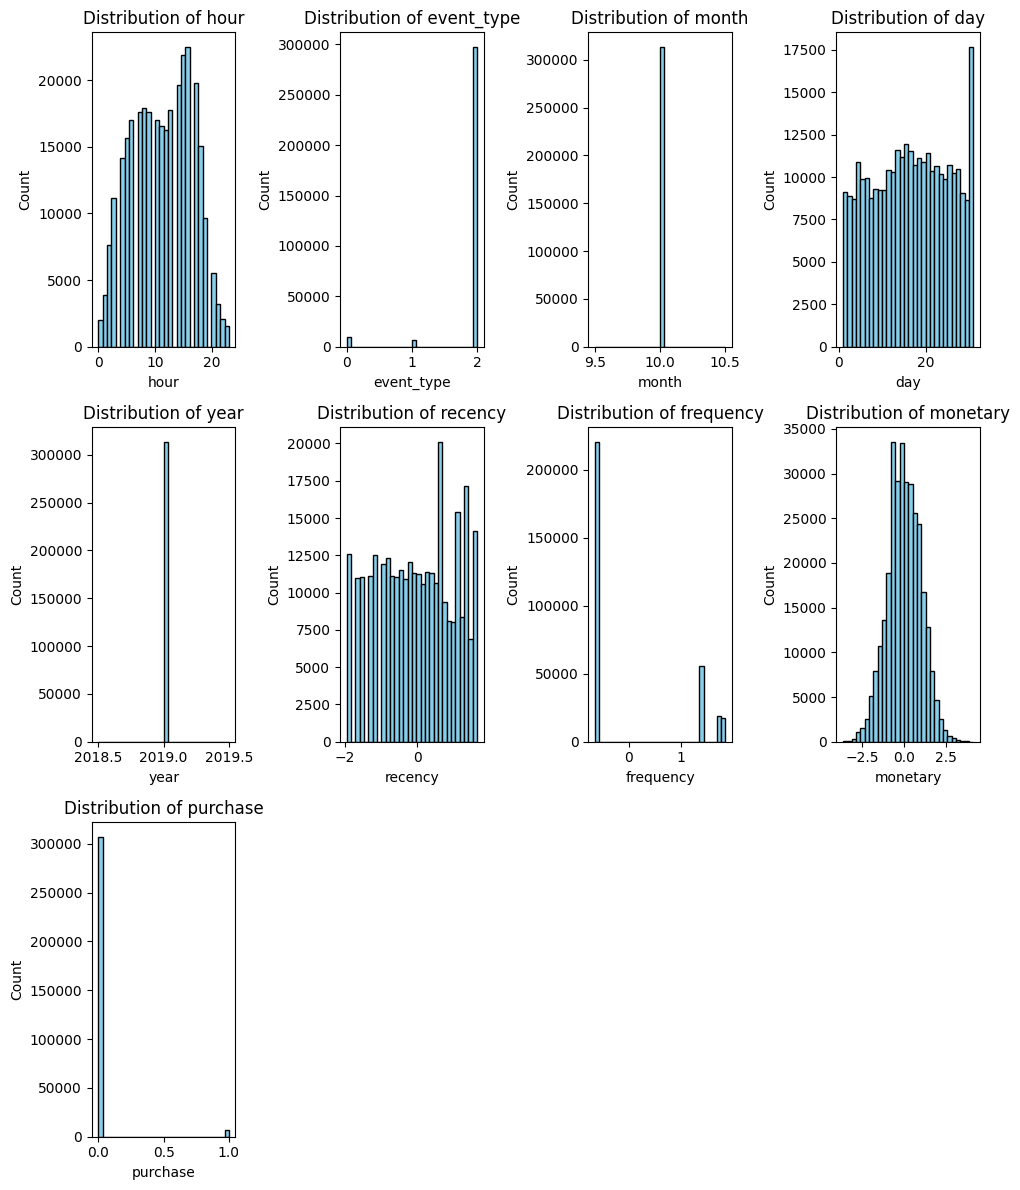

In [45]:
#histogram for all new features
features = ['hour', 'event_type', 'month',  'day', 'year','recency','frequency','monetary', 'purchase']
plt.figure(figsize=(10, 12))
for i, col in enumerate(features, 1):
    plt.subplot(3, 4, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 1.Customer Journey ##

In [46]:
views=df[df['event_type']=='view']['user_id'].nunique()
carts = df[df['event_type']=='add_to_cart']['user_id'].nunique()
purchases = df[df['event_type']=='purchase']['user_id'].nunique()

In [47]:
total_orders = df['user_id'].nunique()          
total_purchases = df[df['price']>0]['user_id'].nunique()

In [48]:
print(f"Total Orders: {total_orders}")
print(f"Total Purchases: {total_purchases}")

Total Orders: 243101
Total Purchases: 127954


In [49]:
# calculate conversion rate ----> purcahse / orders

conversion_rate = 128071/243101
print(f"conversion rate: {conversion_rate:.2%}")

conversion rate: 52.68%


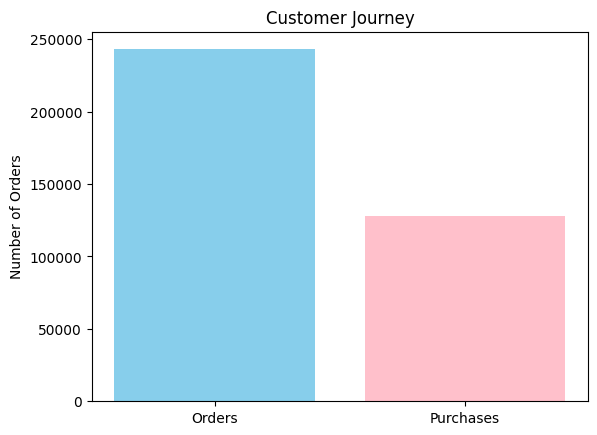

In [50]:
# viz using bar plot (orders vs purchase )
stages = ['Orders', 'Purchases']
counts = [total_orders, total_purchases]
colors = ['skyblue', 'pink']
plt.bar(stages, counts, color=colors)
plt.title('Customer Journey')
plt.ylabel('Number of Orders')
plt.show()

## 2.Time-series analysis of daily, weekly, and seasonal purchasing patterns ##

In [51]:
df['date'] = pd.to_datetime(df['event_time']).dt.date

In [52]:
# chect about data if it organized or not
  
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

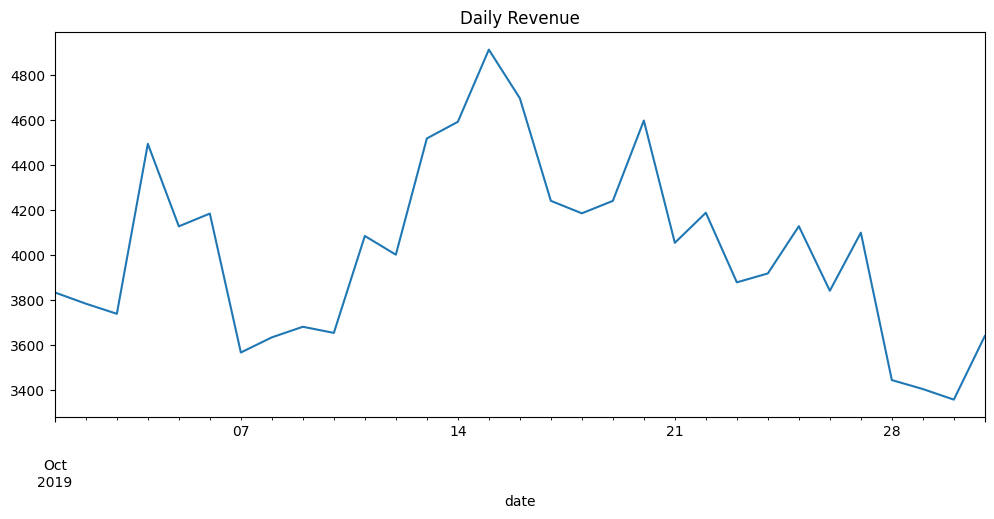

In [53]:
#daily
daily = df[df['price'] > 0].groupby('date')['price'].sum()
daily.plot(figsize=(12,5))
plt.title("Daily Revenue")
plt.show()

# we show in day 14 to 19 purchase was hight then from day 21 to day 1 in next month purchase are down

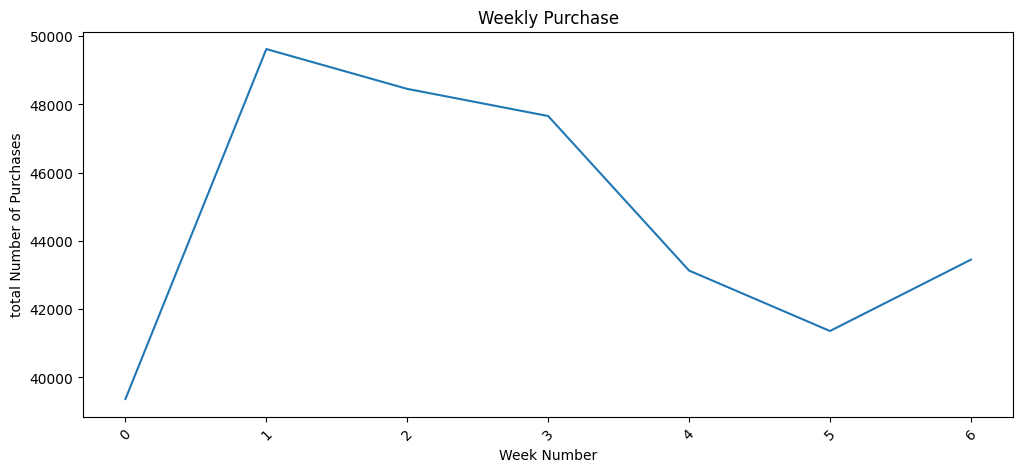

In [54]:
#weekly 
weekly = df.groupby('week_end').size()
plt.figure(figsize=(12,5))
plt.plot(weekly.index, weekly.values)
plt.title("Weekly Purchase")
plt.xlabel("Week Number")
plt.ylabel("total Number of Purchases")
plt.xticks(rotation=45)
plt.show()

# we show in week 1 in oct month total no of purchase customer do is more hight opsite that in week 3 to 6 tha purchase has down

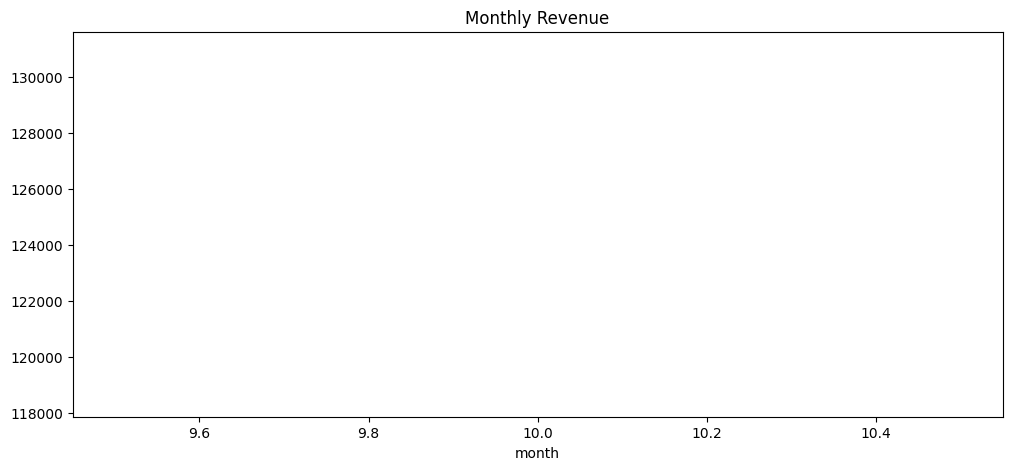

In [55]:
# monthly

monthly = df[df['price'] > 0].groupby('month')['price'].sum()
monthly.plot(figsize=(12,5))
plt.title("Monthly Revenue")
plt.show()

##  3.Product category popularity and cross-category association rules ##

## * product category popularity ##

category_code
97     88934
70     13296
101     9720
45      7067
48      6977
96      6250
68      3108
28      2333
98      1865
35       982
Name: count, dtype: int64


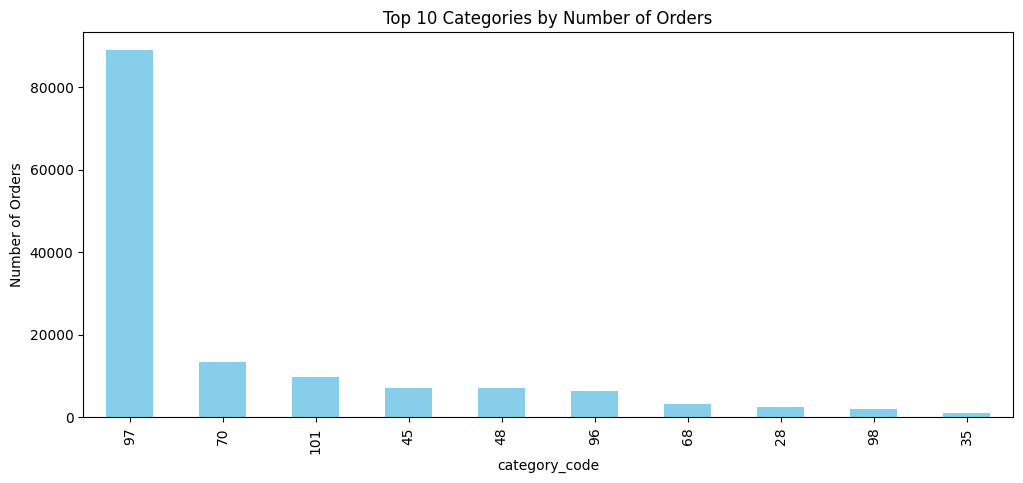

In [56]:
# it show how many purchases for each category generated

purchases = df[df['price'] > 0]
top_categories = purchases['category_code'].value_counts().head(10)
print(top_categories)
plt.figure(figsize=(12,5))
top_categories.plot(kind='bar', color='skyblue')
plt.title("Top 10 Categories by Number of Orders")
plt.ylabel("Number of Orders")
plt.show()

# then we show that category no 97 has a hight orders

## * Cross-Category Association Rules ##

In [57]:
from mlxtend.frequent_patterns import apriori, association_rules

#apriori----> means which items commonly occur together

# prepare data for apriori

basket = df.groupby(['session_id', 'category_code'])['category_code'].count().unstack().fillna(0)

In [58]:
# convert to 0/1

basket = (basket > 0).astype(int)

In [ ]:
#Generate Frequent Category Sets

frequent_items = apriori(basket, min_support=0.15, use_colnames=True, low_memory=True)
frequent_items.head()

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.head(20)

NameError: name 'frequent_items' is not defined

## 4.Customer Lifetime ##

## *CLV ##

In [ ]:
# show Total money spent per customer

clv = df[df['price'] > 0].groupby('user_id')['price'].sum()

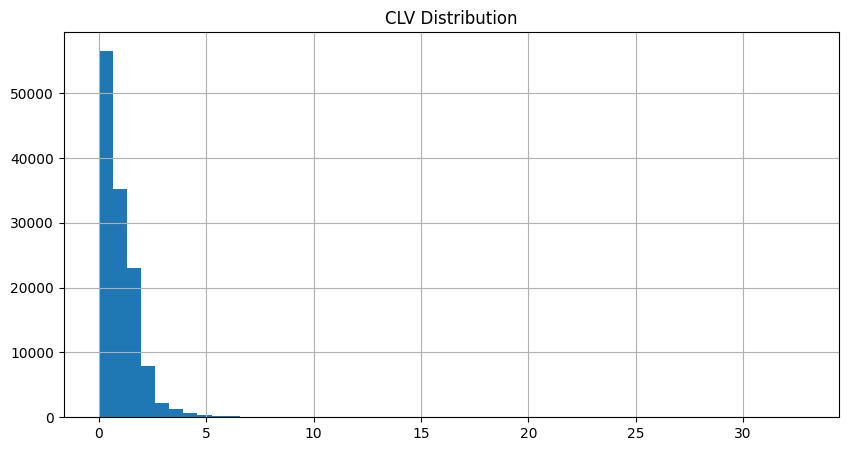

In [ ]:
clv.hist(bins=50, figsize=(10,5))
plt.title("CLV Distribution")
plt.show()

## * Pareto 80/20 Rule ##

In [ ]:
#80/20 rule 
# 20% of customers achievesd 80% of revenuses

sorted_clv = clv.sort_values(ascending=False)
cumulative = sorted_clv.cumsum() / sorted_clv.sum()
top_20_percent_customers = cumulative[cumulative <= 0.8].count()
print("Customers contributing to 80% revenue:", top_20_percent_customers)


Customers contributing to 80% revenue: 59457


## 5.Cohort analysis to track customer retention over time ##

In [ ]:
#prepering first month for each customer

#first_month = df.groupby('user_id')['month'].min()
#df = df.join(first_month.rename("cohort"), on='user_id')

In [ ]:
#cohort_counts = df.groupby(['cohort', 'month'])['user_id'].nunique().reset_index()
#cohort_pivot = cohort_counts.pivot_table(
    #index='cohort',
    #columns='month',
    #values='user_id'
#)
#cohort_pivot.div(cohort_pivot.iloc[:,0], axis=0)


month,2019-10
cohort,
2019-10,1.0


In [ ]:
# and then EDA part done by Menna atef 

### Importing ALL Supervised Models 

In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.metrics import mean_squared_error, accuracy_score, auc
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping

In [ ]:
df_cop = df.copy()

In [ ]:
# Remove Columns Not Needed 
df_cop = df_cop.drop(['event_time', 'user_session', 'date'], axis=1) 

### Split Data 

#### To Handle The Smote 

In [ ]:
# Split The Data Into Features And Target
x = df_cop.drop(columns=["purchase", "recency", "frequency", "monetary" , "event_type"])
y = df_cop["purchase"]

In [ ]:
# impute Nan in Time_difference 
x['time_diff'] = x['time_diff'].fillna(0)

In [ ]:
# check nan 
x.isna().sum()

In [ ]:
#Split The Data Into Train And Temp ( Valid + Test )
x_train, x_temp, y_train, y_temp = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
    )

In [ ]:
# to Split The Temp Into Validation And Test Set
x_valid, x_test, y_valid, y_test = train_test_split(
    x_temp,
    y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
    )

In [ ]:
# To Know The Shape Of Each Set
print("Train:", x_train.shape)
print("Valid:", x_valid.shape)
print("Test:", x_test.shape)

In [ ]:
cat_cols = [
    "category_code",
    "brand" , 
]

Implement LightGBM with categorical feature support for purchase prediction

In [ ]:
# Check The Distribution Of Target
df["purchase"].value_counts()

In [ ]:
# wE wIIL NOT Make Smote For Target Because We Will Use Balance In Model


# from imblearn.over_sampling import SMOTE
# smote = SMOTE()

# x_resambled , y_resambled = smote.fit_resample(x_train , y_train)

# y_resambled.value_counts()

In [ ]:
# Convert Categorical Columns To Category Dtype

for col in cat_cols:
    x_train[col] = x_train[col].astype("category")
    x_valid[col] = x_valid[col].astype("category")
    x_test[col]  = x_test[col].astype("category")

In [ ]:
# Get Categorical Feature Indices For LightGBM
cat_indices = [x_train.columns.get_loc(c) for c in cat_cols]
print(" categorical_feature indices :", cat_indices)

In [ ]:
# Define  LightGBM Classifier Model
lgbm = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.00001,
    num_leaves=31,
    max_depth= -1 , 
    class_weight='balanced',
    random_state=42
)

In [ ]:
# Fit The Model
lgbm.fit(
    x_train,
    y_train,
    eval_set=[(x_valid, y_valid)],    
    eval_metric='logloss',
    categorical_feature=cat_indices,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=10)
        ]
)

In [ ]:
# Check If All Categorical Columns Are In The Training Set
print(set(cat_cols) - set(x_train.columns))

In [ ]:
# Find The Best Threshold Using F1 Score

probs_valid = lgbm.predict_proba(x_valid)[:,1]
precision, recall, thresholds = precision_recall_curve(y_valid, probs_valid)
# Calculate F1 Scores
f1 = 2*(precision*recall) / (precision+recall+1e-9)
best_thresh = thresholds[np.argmax(f1)]

print("Best threshold :", best_thresh)

In [ ]:
# Make Predictions On Test Set Using The Best Threshold
probs_test = lgbm.predict_proba(x_test)[:,1]
y_pred_test = (probs_test >= best_thresh).astype(int)

In [ ]:
# حساب Accuracy
acc = accuracy_score(y_test, y_pred_test)

print("Accuracy : ", acc)

In [ ]:
# حساب Precision --- Recall --- F1-Score 
print(classification_report(y_test, y_pred_test))

auc = roc_auc_score(y_test, y_pred_test)
print("ROC-AUC : ", auc)

print(confusion_matrix(y_test, y_pred_test))

In [ ]:
y_scores = lgbm.predict_proba(x_test)[:,1]
ap = average_precision_score(y_test, y_scores)
precision, recall, thresh = precision_recall_curve(y_test, y_scores)

print("Average precision:", ap)


Build Random Forest regressor for customer lifetime value estimation

In [ ]:
# create future monetary feature
df = df.sort_values(['user_id', 'date'])

df['future_monetary'] = df.groupby('user_id')['monetary'].shift(-1)
df['future_monetary'] = df['future_monetary'].fillna(0)

In [ ]:
# Prepare features and target for CLV prediction
x_clv = df[['recency', 'frequency', 'monetary', 'year',
             'month', 'day', 'hour', 'week_end', 'is_week_end']
          ]
y_clv = df['future_monetary']


In [ ]:
# Split data 
x_train_clv, x_temp_clv, y_train_clv, y_temp_clv = train_test_split(
    x_clv, y_clv,
    test_size=0.3,
    random_state=42
    )

In [ ]:
x_valid_clv, x_test_clv, y_valid_clv, y_test_clv = train_test_split(
    x_temp_clv,
    y_temp_clv,
    test_size=0.5,
    random_state=42
    )

In [ ]:
# To Know The Shape Of Each Set
print("Train:", x_train_clv.shape)
print("Valid:", x_valid_clv.shape)
print("Test:", x_test_clv.shape)

In [ ]:
rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

rfr.fit(
    x_train_clv,
    y_train_clv
)

In [ ]:
y_pred_rfr = rfr.predict(x_test_clv)

rmse = np.sqrt(mean_squared_error(y_test_clv, y_pred_rfr))
print(f"Validation RMSE:{rmse:.4f}")

Train XGBoost with early stopping on validation set

In [ ]:
x = df.drop(columns=["purchase"])
y = df["purchase"]

In [ ]:
# impute Nan in Time_difference 
x['time_diff'] = x['time_diff'].fillna(0)

In [ ]:
x_train ,x_temp ,y_train , y_temp = train_test_split(
    x , y , 
    test_size=0.3,
    random_state=42,
    stratify=y
    )

In [ ]:
x_valid , x_test , y_valid , y_test = train_test_split(
    x_temp,
    y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
    )

In [ ]:
cat_col = [
    "category_code",
    "brand" 
]

In [ ]:
drop_cols = ['event_time', 'user_session', 'date']

x_train = x_train.drop(columns=drop_cols)
x_valid = x_valid.drop(columns=drop_cols)
x_test  = x_test.drop(columns=drop_cols)

In [ ]:
# Convert Categorical Columns To Category Dtype

for col in x_train.select_dtypes(include='object').columns:
    x_train[col] = x_train[col].astype('category')
    x_valid[col] = x_valid[col].astype('category')
    x_test[col] = x_test[col].astype('category')

In [ ]:
# Initialize the model
xgb = XGBClassifier(
    n_estimators=500,       
    learning_rate=0.0001,
    max_depth=12,
    early_stopping_rounds=50,
    enable_categorical=True,
    random_state=42
)

# Fit with early stopping
xgb.fit(
    x_train,
    y_train,
    eval_set=[(x_valid, y_valid)],
    verbose=True
)


In [ ]:
print("Best iteration:", xgb.get_booster().best_iteration)

In [ ]:
# Make Predictions On Validation Set
y_pred_xgb = xgb.predict(x_valid)
acc = accuracy_score(y_valid, y_pred_xgb)
print("Accuracy:", acc)

In [ ]:
# Probabilities from the model
# y_prob = xgb.predict_proba(x_valid)[:, 1]

# precision, recall, thresholds = precision_recall_curve(y_valid, y_prob)
# pr_auc = auc(recall, precision) 
# plt.plot(recall, precision)
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title(f"Precision - Recall Curve (AUC = {pr_auc:.4f})")
# plt.show()


In [ ]:
rmse = np.sqrt(mean_squared_error(y_valid, y_prob))
print("RMSE:", rmse)

In [ ]:
def business_cost(y_true, y_prob, threshold=0.5,
                  cost_fp=5, cost_fn=20, reward_tp=30):
    
    y_pred = (y_prob >= threshold).astype(int)

    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))

    total_profit = (tp * reward_tp) - (fp * cost_fp) - (fn * cost_fn)

    return {"TP": tp, "FP": fp, "FN": fn, "profit": total_profit}

result = business_cost(y_valid, y_prob, threshold=0.5)
result

In [ ]:
thresholds = np.linspace(0.1, 0.9, 50)
profits = []

for t in thresholds:
    r = business_cost(y_valid, y_prob, threshold=t)
    profits.append(r["profit"])

best_threshold = thresholds[np.argmax(profits)]
best_profit = max(profits)

print("Best Threshold:", best_threshold)
print("Best Profit:", best_profit)

In [ ]:
result = permutation_importance(
    xgb,
    x_valid,
    y_valid,
    n_repeats=10,
    random_state=42,
    scoring="roc_auc"   
)

In [ ]:
perm_imp = pd.DataFrame({
    "feature": x_valid.columns,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values(by="importance_mean", ascending=False)

print(perm_imp.head())

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(perm_imp["feature"], perm_imp["importance_mean"])
plt.xlabel("Mean Importance Decrease (AUC)")
plt.title("Permutation Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# At The End  Supervised ML By Menna Haitham 

## Unsupervised ML

In [ ]:
#Check the Co-relation between features without PCA
sns.heatmap(df[scale_cols].corr())
#high corelation pca needs to be applied to reduce dim

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
#to find prefered no. oof com in pca 
# Fit PCA and calculate cumulative explained variance
pca = PCA()
pca.fit(df[scale_cols])
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Find the number of components to retain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components: {n_components}")

In [ ]:
pca_data = PCA(n_components=3)
pca_data = pca_data.fit_transform(df[scale_cols])

In [ ]:
Kmeans = KMeans(n_clusters=8,random_state=42,n_init=10)
df['Cluster']=Kmeans.fit_predict(pca_data)

In [ ]:
Kmeans.cluster_centers_

In [ ]:
type(pca_data)


In [ ]:
pca_data = pd.DataFrame(pca_data,columns=['PC1','PC2','PC3'])
pca_data.head()

In [ ]:
sns.heatmap(pca_data.corr())
#after pca and clustering 

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ 

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(
    n_components=8,        # number of Gaussian components
    covariance_type='full',
    random_state=42
)

gmm.fit(df[scale_cols])               
gmm_data = gmm.predict(df[scale_cols])

In [ ]:
gmm_probs = gmm.predict_proba(df[scale_cols])
gmm_data = gmm_probs.argmax(axis=1)

In [ ]:
gmm.means_

In [ ]:
#fig = plt.figure(figsize=(10,8))


#for cluster_id in np.unique(gmm_data):
   # mask = gmm_data == cluster_id
    #plt.scatter(pca_data.loc[mask, pca_data.columns[0]],
              # pca_data.loc[mask, pca_data.columns[1]],
              # label=f"GMM Cluster {cluster_id}", alpha=0.5)

# Plot GMM means
#plt.scatter(gmm.means_[:, 0],
         #  gmm.means_[:, 1],
           #s=200, c='black', marker='X', label='Cluster Means')

#plt.title("GMM Clustering Visualization")
#plt.xlabel("PC1")
#plt.ylabel("PC2")
#plt.legend()
#plt.show()


In [ ]:
import numpy as np   # comparison kmeans & gmm 
agreement = (df['Cluster'] == gmm_data).mean()
uncertainty = (gmm_probs.max(axis=1) < 0.6).mean()

In [ ]:
df.head()

In [ ]:
user_va = df.groupby("user_id").agg(
    purchase=("purchase", "sum"),   #conversion
    session_id=("session_id", "count"),  #orders
    price=("price","sum") #revenue
).reset_index()
user_va["engaged_flag"] = user_va["session_id"] > 1

In [ ]:
users = df[scale_cols].index.to_series()
seg_df = pd.DataFrame({
    "user_id": users.values,
    "segment_kmeans": df['Cluster'] ,
    "segment_gmm": gmm_data,
    "gmm_confidence": gmm_probs.max(axis=1)
})

# Join outcomes
outcomes = user_va.set_index("user_id")  
seg_metrics = (
    seg_df.set_index("user_id")
    .join(outcomes, how="left")
    .groupby("segment_kmeans")
    .agg(
        users=("purchase", "count"),
        conversion_rate=("purchase", lambda x: x.sum() / x.count() if x.count() else 0),
        session_id=("session_id", "sum"),
        price=("price", "sum")
    )
)
seg_metrics["aov"] = seg_metrics["price"] / seg_metrics["session_id"].replace(0, np.nan)
seg_metrics = seg_metrics.fillna(0)


In [ ]:
baseline_cr = outcomes["purchase"].sum() / outcomes["purchase"].count()
baseline_aov = outcomes["price"].sum() / outcomes["session_id"].replace(0, np.nan).sum()

seg_metrics["con.rate_lift"] = seg_metrics["conversion_rate"] / baseline_cr
seg_metrics["aov_lift"] = seg_metrics["aov"] / baseline_aov

In [ ]:
seg_metrics["con.rate_lift"]

In [ ]:
seg_metrics["aov_lift"]

In [ ]:
user_va["purchase"].sum()

In [ ]:
df['event_type'].value_counts()

In [ ]:
event_map = {0: "view", 1: "cart", 2: "purchase"}
df["event_type"] = df["event_type"].map(event_map)
print(df["event_type"].value_counts())


In [ ]:
# Overall conversion rate
overall_cr = (df["event_type"] == "purchase").mean()

# Conversion rate per cluster
cluster_cr = df.groupby("Cluster")["event_type"].apply(lambda x: (x == "purchase").mean())

# Lift
con_rate_lift = cluster_cr / overall_cr
print(con_rate_lift)

In [ ]:
cluster_size = df.groupby("Cluster").size()
# Combine into one DataFrame
seg_metrics = pd.DataFrame({
    "cluster_size": cluster_size,
    "conversion_rate": cluster_cr,
    "con_rate_lift": con_rate_lift
})

print(seg_metrics)

In [ ]:
seg_metrics["con_rate_lift"]

In [ ]:
# Overall AOV
overall_aov = df.loc[df["event_type"] == "purchase", "price"].mean()

# Cluster AOV
cluster_aov = df.loc[df["event_type"] == "purchase"].groupby("Cluster")["price"].mean()

# Lift
aov_lift = cluster_aov / overall_aov

# Combine into metrics table
seg_metrics = pd.DataFrame({
    "cluster_aov": cluster_aov,
    "aov_lift": aov_lift
})
print(seg_metrics)

In [ ]:
import os
from tqdm import tqdm

In [ ]:
df['category_id'] = df['category_id'].apply(str)
df.head()

In [ ]:
df.dropna(subset=["category_code"], inplace=True)

# Split category_code into levels
df["category_lvl1"] = df["category_code"].apply(
    lambda x: str(x).split(".")[0] if "." in str(x) else str(x)
)

df["category_lvl2"] = df["category_code"].apply(
    lambda x: str(x).split(".")[1] if "." in str(x) else None
)


# Reset index
df.reset_index(drop=True, inplace=True)

# Filter only purchases
only_purchases = df.loc[df.event_type == "purchase"]

In [ ]:
#total sales for each brand 
purchases_with_brands = only_purchases.loc[only_purchases.brand.notnull()]
top_sellers_count = purchases_with_brands.groupby('brand').brand.agg([len]).sort_values(by="len", ascending=False)
top_sellers_count.reset_index(inplace=True)
top_sellers_count.rename(columns={"len" : "n°sales/brand"}, inplace=True)

In [ ]:
top_sellers_count.describe()


In [ ]:
top_sellers_count

In [ ]:

plt.figure(figsize=(10,10))
plt.pie(top_sellers_count["n°sales/brand"].head(10),labels=top_sellers_count["brand"].head(10))
plt.axis('equal')

In [ ]:
def norm(tab): 
    if len(tab) > 1:
        max  = np.array(tab).max()
        min = np.array(tab).min()
        return [round((x - min) / (max-min) ,3) for x in tab]
    else : 
        return [1]

def norm_categ_lvl2(dict_categ): 
    for k,v in dict_categ.items(): 
        tab = norm([v for k,v  in v.items()])
        dict_categ[k] ={k:v for (k,_),v in zip(v.items(),tab)}
    return dict_categ


In [ ]:
sales_list  = [x[1] for x in zip(top_sellers_count["brand"], top_sellers_count["n°sales/brand"])]
n_sales_brand_norm =pd.Series( norm(sales_list),name="n°sales/brand")
n_sales_brand_norm = pd.concat([top_sellers_count["brand"], n_sales_brand_norm],axis=1)
n_sales_brand_norm

In [ ]:
# Calculate the number of sales for each category 

category_lvl1_purshace = purchases_with_brands.groupby("category_lvl1")["category_lvl1"].agg([len]).sort_values(by="len", ascending=False)
category_lvl1_purshace.reset_index(inplace=True)
category_lvl1_purshace.rename(columns={"len":"n°sales/category"}, inplace=True)
# visualisation

plt.figure(figsize=(10,10))
plt.pie(category_lvl1_purshace["n°sales/category"].head(10),labels=category_lvl1_purshace["category_lvl1"].head(10))
plt.axis('equal')

In [ ]:
n_sales_categ_lvl1  = [x[1] for x in zip(category_lvl1_purshace["category_lvl1"], category_lvl1_purshace["n°sales/category"])]
n_sales_categ_lvl1_norm = norm(n_sales_categ_lvl1)
categ_lvl1_norm = pd.concat([category_lvl1_purshace["category_lvl1"],pd.Series(n_sales_categ_lvl1_norm,name="weight_lvl1")],axis=1)
categ_lvl1_norm

In [ ]:
category_lvl2_ = purchases_with_brands.groupby(["category_lvl1","category_lvl2"])["category_lvl2"].agg([len])
category_lvl2_.reset_index(inplace=True)


In [ ]:
# Normelize the sales for each subcategory based on the category
categories =set(category_lvl2_["category_lvl1"])
dict_categ = {}
for categ in categories: 
    dict_categ[categ] = dict(np.array(category_lvl2_[category_lvl2_["category_lvl1"]== categ]  [  ["category_lvl2",'len']  ]))
dict_categ_norm = norm_categ_lvl2(dict_categ)

categ_lvl2_norm = []
for k,v in dict_categ_norm.items():
    [categ_lvl2_norm.append((k_,v_)) for k_,v_ in v.items()]

categ_lvl2_norm = dict(categ_lvl2_norm)
categ_lvl2_norm

In [ ]:
keys = pd.Series([k for k,_ in categ_lvl2_norm.items()],name="category_lvl2")
values = pd.Series([v for  _,v in categ_lvl2_norm.items()],name="weight_lvl2")
categ_lvl2_norm = pd.concat([keys,values],axis=1)
categ_lvl2_norm


In [ ]:
# We calculate the sales for every product (this will be our Y)
product_sales = purchases_with_brands.groupby("product_id")["product_id"].agg([len]).sort_values(by="len", ascending=False)
product_sales.reset_index(inplace=True)
product_sales.rename(columns={"len":"n°sales/product"}, inplace=True)
product_sales


In [ ]:
def transform_y_to_classes(x):
    if (x < 10):
        return "very bad"
    elif (x < 40):
        return "bad"
    elif (x < 80):
        return "medium"
    elif (x < 200):
        return "good"
    elif (x < 1000):
        return "very good"
    else:
        return "excellent"


In [ ]:
product_sales["product rate"] = product_sales["n°sales/product"].apply(lambda x : transform_y_to_classes(x))
product_sales

In [ ]:
df = pd.merge(df, n_sales_brand_norm, on="brand", how="left")
if len(df) > 0:
    print(df.sample(min(8, len(df))))
else:
    print("No rows left after merge.")


In [ ]:
df = pd.merge(df, n_sales_brand_norm, on="brand", how="left")
df = pd.merge(df, categ_lvl1_norm, on="category_lvl1", how="left")
df = pd.merge(df, categ_lvl2_norm, on="category_lvl2", how="left")
df = pd.merge(df, product_sales.drop("n°sales/product", axis=1), on="product_id", how="left")

# Sample safely
if len(df) > 0:
    display(df.sample(min(8, len(df))))
else:
    print("No rows left after merge.")


In [ ]:
#We drop the useless culumns

Final_DF= df[df["event_type"]=="purchase"]

Final_DF.sample(8)

# We normelize the price also
norm_price = norm(Final_DF["price"])
Final_DF["price"] = norm_price
Final_DF.sample(8)

In [ ]:
# at the end unsupervised by bato;

### Deep learning 

In [ ]:
import tensorflow as tf
from tensorflow.keras import  layers , models

In [ ]:
# Take Important Columns And Sort Values 

df = df[['user_id', 'event_time', 'product_id']].copy()

df = df.sort_values(['user_id', 'event_time'])
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode product_id -> integer index
item_enc = LabelEncoder()
df['item_idx'] = item_enc.fit_transform(df['product_id'])

n_items = df['item_idx'].nunique()
print("Number of unique items:", n_items)

# Group by user: each user -> list of item indices
user_seqs = df.groupby('user_id')['item_idx'].apply(list)
print("Example user sequence:", user_seqs.iloc[0][:10])

SEQ_LEN = 20      # max length we use
MIN_SEQ_LEN = 5   # ignore very short histories

X, y = [], []

for seq in user_seqs:
    if len(seq) < MIN_SEQ_LEN + 1:
        continue
    # sliding window over the sequence
    for end in range(MIN_SEQ_LEN, len(seq)):
        start = max(0, end - SEQ_LEN)
        input_seq = seq[start:end]   # history
        target = seq[end]            # next item

        # Reserve 0 for padding -> shift all ids by +1
        input_seq = [i + 1 for i in input_seq]
        X.append(input_seq)
        y.append(target + 1)         # target also shifted

X = np.array(X, dtype=object)
y = np.array(y)

print("Number of samples:", len(X))

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_padded = pad_sequences(
    X, maxlen=SEQ_LEN, padding='pre', truncating='pre', value=0
)

vocab_size = n_items + 1   # +1 for padding index 0
print("X shape:", X_padded.shape)
print("vocab size (with pad):", vocab_size)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_padded, y, test_size=0.2, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(X_train.shape, X_val.shape, X_test.shape)

In [ ]:
BATCH_SIZE = 256

def make_ds(X, y, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(X), reshuffle_each_iteration=True)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds(X_train, y_train, shuffle=True)
val_ds   = make_ds(X_val,   y_val,   shuffle=False)
test_ds  = make_ds(X_test,  y_test,  shuffle=False)

In [ ]:
EMBED_DIM = 64

def build_lstm_model(vocab_size, seq_len,
                     embed_dim=EMBED_DIM, lstm_units=128):
    inputs = layers.Input(shape=(seq_len,), name="item_sequence")

    # Embedding for item IDs, 0 is padding
    x = layers.Embedding(
        input_dim=vocab_size,
        output_dim=embed_dim,
        mask_zero=True,
        name="item_embedding"
    )(inputs)

    # LSTM with 128 units
    x = layers.LSTM(lstm_units, name="lstm")(x)

    # Predict probabilities over all items
    outputs = layers.Dense(vocab_size, activation='softmax',
                           name="next_item")(x)

    model = models.Model(inputs, outputs)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy']
    )
    return model

lstm_model = build_lstm_model(vocab_size, SEQ_LEN)
lstm_model.summary()

In [ ]:
lstm_model.evaluate(test_ds, verbose=1)